In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../../static/csv/data.csv")

In [4]:
def process_position():
    """
    Process the 'mainPosition' and 'subPosition' columns to create a new 'Position' column,
    where values are either the combination of 'mainPosition' and 'subPosition' or 'no' if 'subPosition' is 'no'.
    Drops the 'mainPosition' and 'subPosition' columns, explodes the 'Position' column, and returns the resulting DataFrame.
    """
    data['Position'] = data['mainPosition'] + '\n' + data['subPosition'].replace('no', 'no')
    temp = data.drop(['mainPosition', 'subPosition'], axis=1)
    result = temp.assign(Position=temp['Position'].str.split('\n')).explode('Position')
    return result

   Position  Count
0   fighter     35
1      tank     30
2      mage     30
3  assassin     17
4   support     14
5  marksman     14


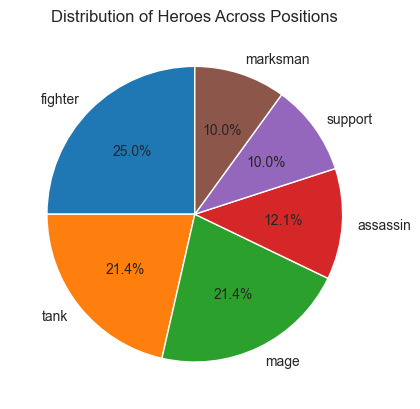

In [5]:
# Count the number of heroes for each 'Position' and print the result.
df = process_position()
position_count = df['Position'].value_counts().drop('no')
position_count = position_count.reset_index()
position_count.columns = ['Position', 'Count']
print(position_count)

plt.pie(position_count['Count'], labels=position_count['Position'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heroes Across Positions')
plt.show()

   position     min     max
0  assassin  2886.0  3483.0
1   fighter  2862.0  3622.0
2      mage  1600.0  3323.0
3  marksman  2977.0  3401.0
4   support  2958.0  3450.0
5      tank   946.0  3622.0


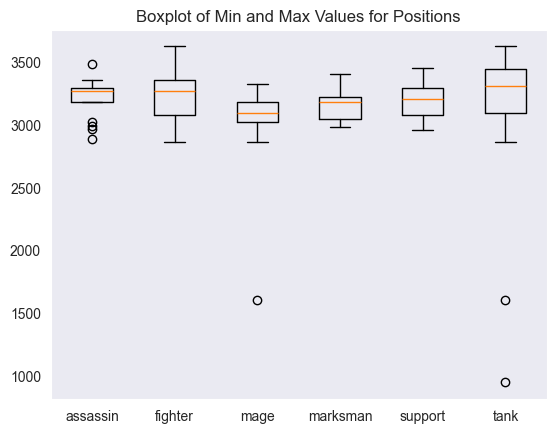

In [6]:
#Calculate the minimum and maximum health for each 'mainPosition' and 'subPosition'.
#Returns the resulting DataFrame.
main_position_stats = data.groupby(['mainPosition'])['MaximumHealth'].agg(['min', 'max']).reset_index()
sub_position_stats = data.groupby(['subPosition'])['MaximumHealth'].agg(['min', 'max']).reset_index()
main_position_stats.columns = ['position', 'min_main', 'max_main']
sub_position_stats.columns = ['position', 'min_sub', 'max_sub']
merged_stats = pd.merge(main_position_stats, sub_position_stats, how='outer', on='position',
                        suffixes=('_main', '_sub'))
merged_stats['min_combined'] = merged_stats.apply(lambda row: np.nanmin([row['min_main'], row['min_sub']]), axis=1)
merged_stats['max_combined'] = merged_stats.apply(lambda row: np.nanmax([row['max_main'], row['max_sub']]), axis=1)
merged_stats = merged_stats[['position', 'min_combined', 'max_combined']][
    merged_stats['position'] != 'no'].reset_index()
merged_stats.drop(['index'], axis=1, inplace=True)
merged_stats.columns = ['position', 'min', 'max']
print(merged_stats)

plt.subplot(1,1,1)
x_data = []
x_name = []
x1 = process_position()[process_position()['Position'] != 'no']
x1 = x1.groupby('Position')
for name, group in x1:
    x_data.append(np.array(group['MaximumHealth']))
    x_name.append(name)
plt.boxplot(x_data,labels=x_name,vert=True)
plt.title("Boxplot of Min and Max Values for Positions",loc="center")
plt.grid(visible=False)
plt.show()

   Position  AverageHealth
0  assassin    3208.882353
1   fighter    3238.228571
2      mage    3051.400000
3  marksman    3149.857143
4   support    3200.785714
5      tank    3169.066667


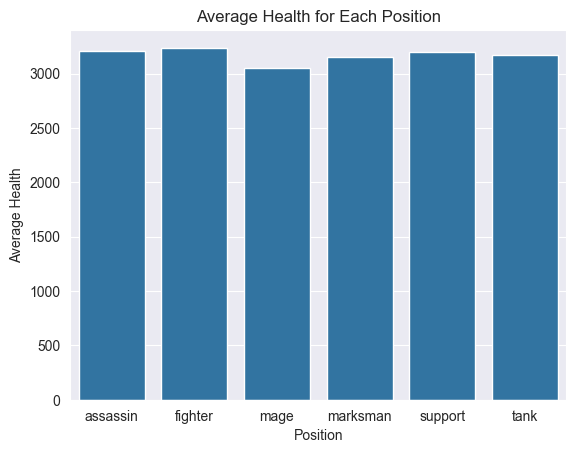

In [67]:
# Calculate the average health for each 'Position' (combining 'mainPosition' and 'subPosition').
# Returns the resulting DataFrame.
df = process_position()
average_health_position = df.groupby("Position")["MaximumHealth"].mean().reset_index()
average_health_position.columns = ["Position", "AverageHealth"]
average_health_position = average_health_position[average_health_position['Position'] != 'no']
average_health_position.reset_index(drop=True, inplace=True)
print(average_health_position)

sns.barplot(x='Position', y='AverageHealth', data=average_health_position)
plt.title('Average Health for Each Position')
plt.xlabel('Position')
plt.ylabel('Average Health')
plt.show()

   Position  MovementSpeed
0  assassin     380.000000
1   fighter     379.714286
2      mage     368.900000
3  marksman     354.285714
4   support     372.857143
5      tank     388.833333


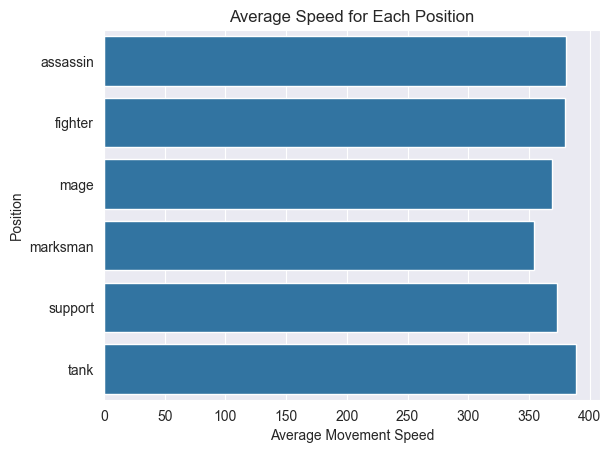

In [68]:
 # Calculate the average health for each 'Position' (combining 'mainPosition' and 'subPosition').
 # Returns the resulting DataFrame.
df = process_position()
average_speed_position = df.groupby("Position")["MovementSpeed"].mean().reset_index()
average_speed_position.columns = ["Position", "MovementSpeed"]
average_speed_position = average_speed_position[average_speed_position['Position'] != 'no']
average_speed_position.reset_index(drop=True, inplace=True)
print(average_speed_position)

sns.barplot(x='MovementSpeed', y='Position', data=average_speed_position, orient='h')
plt.title('Average Speed for Each Position')
plt.xlabel('Average Movement Speed')
plt.ylabel('Position')
plt.show()

   Position      HeroName  MovementSpeed
0   support       DunShan            530
1      tank        MengQi            530
2      mage        MengQi            530
3   fighter     YaDianNuo            410
4  assassin   LanLingWang            400
5  marksman  ChengJiSiHan            370


Text(0.5, 1.0, 'The fastest Moving Speed in each Position')

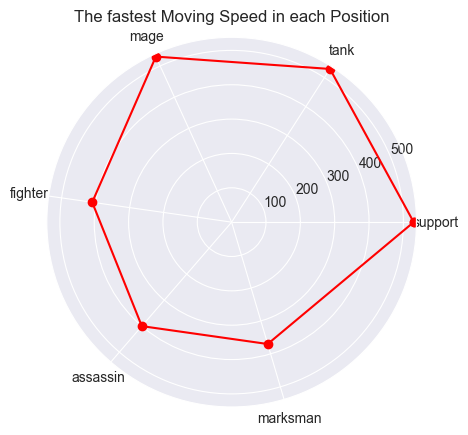

In [89]:
# calculate the average speed for each 'Position'
# Return the resulting DataFrame.
df = process_position()
fastest_heroes = df.sort_values("MovementSpeed", ascending=False).groupby("Position").head(1)[
    ["Position", "HeroName", "MovementSpeed"]]
fastest_heroes.drop(fastest_heroes[fastest_heroes['Position'] == 'no'].index, inplace=True)
fastest_heroes.reset_index(drop=True, inplace=True)
print(fastest_heroes)

labels = fastest_heroes['Position']
x_data = fastest_heroes['MovementSpeed']
x_data=np.concatenate((x_data, [x_data[0]]))
angles=np.concatenate((labels, [labels[0]]))
plt.polar(angles,x_data,color='r',marker="o")
plt.title("The fastest Moving Speed in each Position")

   Position  PhysicalDamageReduction  MagicDamageReduction
0  assassin                     12.9                   7.6
1   fighter                     14.1                   7.6
2      mage                     13.0                   7.6
3  marksman                     12.8                   7.6
4   support                     13.7                   7.6
5      tank                     14.3                   7.6
[7.6 7.6 7.6 7.6 7.6 7.6]
[5.3 6.5 5.4 5.2 6.1 6.7]


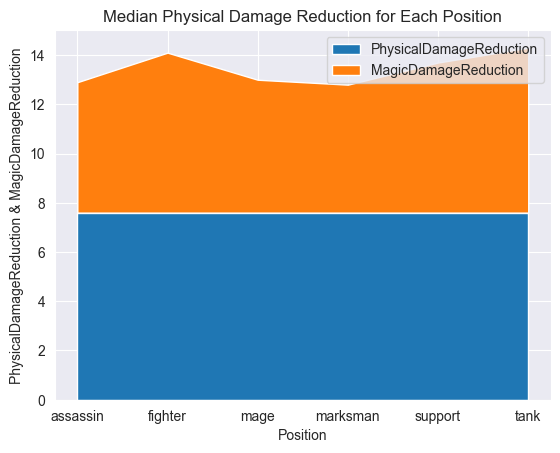

In [115]:
# Calculate the median physical and magic damage reduction for each 'Position'.
# Return the resulting DataFrame.
df = process_position()
mode_attack_both = df.groupby("Position")[
    ["PhysicalDamageReduction", "MagicDamageReduction"]].median().reset_index()
mode_attack_both.columns = ["Position", "PhysicalDamageReduction", "MagicDamageReduction"]
mode_attack_both = mode_attack_both[mode_attack_both['Position'] != 'no']
mode_attack_both.reset_index(drop=True, inplace=True)
print(mode_attack_both)

plt.subplot(1,1,1)

x = np.array(mode_attack_both['Position'])
y1=np.array(mode_attack_both['MagicDamageReduction'])
y2=np.array(mode_attack_both['PhysicalDamageReduction'] - mode_attack_both['MagicDamageReduction'])

labels = ['PhysicalDamageReduction','MagicDamageReduction']
plt.stackplot(x,y1,y2,labels=labels)

plt.title("Median Physical Damage Reduction for Each Position",loc="center")
plt.xlabel("Position")
plt.ylabel('PhysicalDamageReduction & MagicDamageReduction')
plt.legend()
plt.show()

   Position   Kurtosis
0  assassin   0.160075
1   fighter  -0.546453
2      mage  22.205071
3  marksman   0.003690
4   support  -0.842863
5      tank  10.287253
6       all  27.662755


C:\Users\24569\AppData\Local\Temp\ipykernel_15432\3900328024.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Kurtosis', data=max_health_kurtosis_by_position, palette='viridis', legend=False)


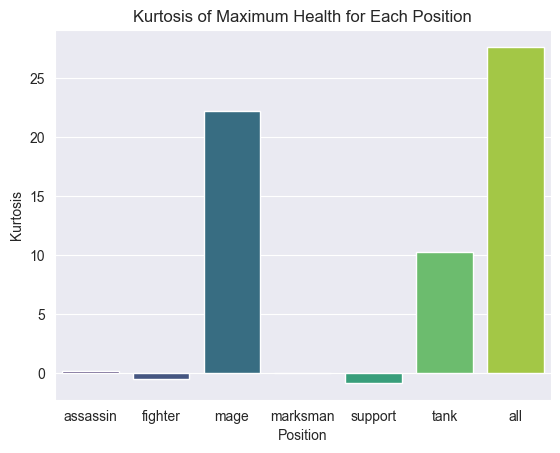

In [95]:
 # Calculate the kurtosis of the 'MaximumHealth' for each 'Position' and the overall kurtosis.
 # Return the resulting kurtosis values.
 
df = process_position()

def calculate_kurtosis(series):
    return pd.DataFrame({"Kurtosis": [series.kurtosis()]})

max_health_kurtosis_by_position = df.groupby("Position")["MaximumHealth"].apply(calculate_kurtosis).reset_index()
max_health_kurtosis_by_position.drop(
    max_health_kurtosis_by_position[max_health_kurtosis_by_position['Position'] == 'no'].index, inplace=True)
max_health_kurtosis_by_position = max_health_kurtosis_by_position.drop("level_1", axis=1)
max_health_kurtosis_all = data["MaximumHealth"].kurtosis()
max_health_kurtosis_by_position.columns = ["Position", "Kurtosis"]
max_health_kurtosis_by_position.reset_index(drop=True, inplace=True)

all_row = pd.DataFrame({"Position": ["all"], "Kurtosis": [max_health_kurtosis_all]})
max_health_kurtosis_by_position = pd.concat([max_health_kurtosis_by_position, all_row], ignore_index=True)
print(max_health_kurtosis_by_position)

sns.barplot(x='Position', y='Kurtosis', data=max_health_kurtosis_by_position, palette='viridis')
plt.title('Kurtosis of Maximum Health for Each Position')
plt.xlabel('Position')
plt.ylabel('Kurtosis')
plt.show()

   Position  MaximumMana
0  assassin          490
1   fighter          490
2      mage          490
3  marksman          490
4   support          490
5      tank          490
6       all          490


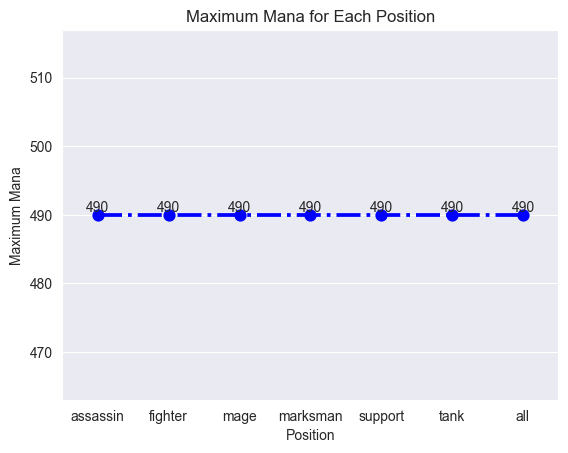

In [133]:
# Find the maximum mana for each 'Position' and the overall maximum mana.
# Return the resulting values.
df = process_position()
max_mana_by_position = df.groupby("Position")["MaximumMana"].max().reset_index()
max_mana_by_position.drop(max_mana_by_position[max_mana_by_position['Position'] == 'no'].index, inplace=True)
max_mana_by_position.columns = ["Position", "MaximumMana"]
max_mana_by_position.reset_index(drop=True, inplace=True)
max_mana_all = data["MaximumMana"].max()

all_row = pd.DataFrame({"Position": ["all"], "MaximumMana": [max_mana_all]})
max_mana_by_position = pd.concat([max_mana_by_position, all_row], ignore_index=True)
print(max_mana_by_position)

sns.pointplot(x='Position', y='MaximumMana', data=max_mana_by_position, color='blue', linestyles='dashdot')
plt.title('Maximum Mana for Each Position')
plt.xlabel('Position')
plt.ylabel('Maximum Mana')
for a,b in zip(max_mana_by_position['Position'],max_mana_by_position['MaximumMana']):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=10)
plt.show()

   Position  Relative
0  assassin  0.283657
1   fighter  0.052049
2      mage  0.061957
3  marksman  0.163065
4   support  0.561379
5      tank  0.214219
6       all  0.197600


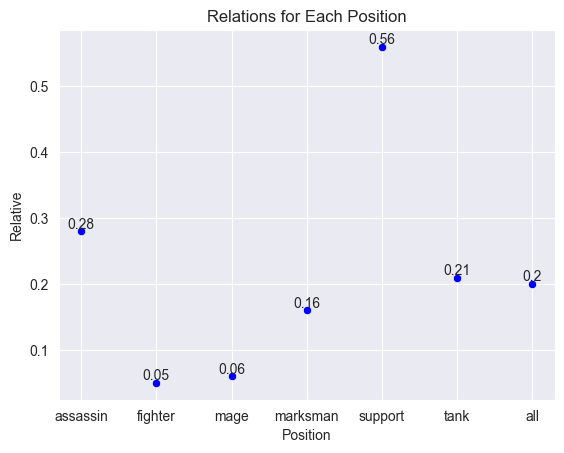

In [134]:
# Calculate the correlation between 'MaximumHealth' and 'HealthRegeneration'.
# Print the resulting correlation.
df = process_position()
correlation_matrix_by_position = df.groupby('Position')[['MaximumHealth', 'HealthRegeneration']].corr().iloc[0::2,
                                 -1].reset_index()
all_row = pd.DataFrame(
    {"Position": ["all"], "HealthRegeneration": [df['HealthRegeneration'].corr(df['MaximumHealth'])]})
correlation_matrix_by_position = pd.concat([correlation_matrix_by_position, all_row], ignore_index=True)
correlation_matrix_by_position = correlation_matrix_by_position[correlation_matrix_by_position['Position'] != 'no']
correlation_matrix_by_position.drop('level_1', axis=1, inplace=True)
correlation_matrix_by_position.columns = ["Position", "Relative"]
correlation_matrix_by_position.reset_index(drop=True, inplace=True)

print(correlation_matrix_by_position)


correlation_matrix_by_position['Relative'] = np.round(correlation_matrix_by_position['Relative'], 2) 
sns.scatterplot(y='Relative', x='Position', data=correlation_matrix_by_position, color='blue')
plt.title('Relations for Each Position')
plt.xlabel('Position')
plt.ylabel('Relative')

for a,b in zip(np.array(correlation_matrix_by_position['Position']),np.array(correlation_matrix_by_position['Relative'])):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=10)
plt.show()

In [12]:
# Calculate the covariance matrix of 'MaximumHealth' and 'HealthRegeneration'.
#     Return the resulting covariance matrix.
covariance = data[['MaximumMana', 'ManaRegeneration']].cov()
covariance

,MaximumMana,ManaRegeneration
MaximumMana,39657.708895,954.716981
ManaRegeneration,954.716981,89.593890


   Position  MAD_PhysicalAttack
0  assassin                 3.0
1   fighter                 5.0
2      mage                 5.0
3  marksman                 7.5
4   support                 6.5
5      tank                 7.5


Text(0, 0.5, 'MAD_PhysicalAttack')

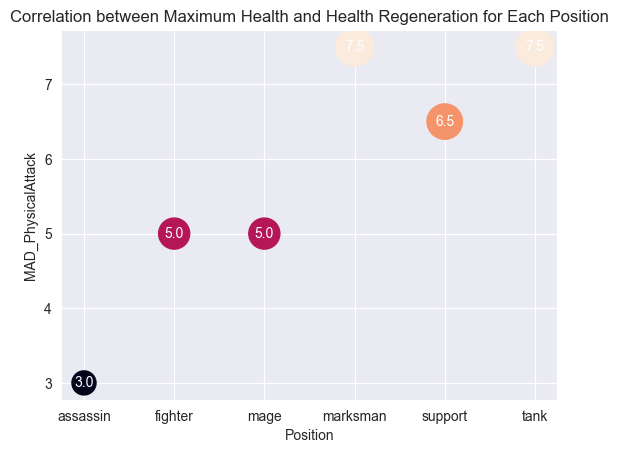

In [120]:
# Calculate the median absolute deviation of 'PhysicalAttack' for each 'Position'.
# Return the resulting DataFrame.
def calculate_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    return mad

df = process_position()
data_cleaned = df.dropna(subset=['PhysicalAttack'])

mad_by_position = data_cleaned.groupby('Position')['PhysicalAttack'].agg(calculate_mad).reset_index()
mad_by_position.columns = ['Position', 'MAD_PhysicalAttack']
mad_by_position.drop(mad_by_position[mad_by_position['Position'] == 'no'].index, inplace=True)
mad_by_position.reset_index(drop=True, inplace=True)
print(mad_by_position)

plt.subplot(1,1,1)

x=np.array(mad_by_position['Position'])
y=np.array(mad_by_position['MAD_PhysicalAttack'])

colors = y*10 - 20
area = y*100
plt.scatter(x,y,c=colors,marker="o",s=area)

plt.title("Correlation between Maximum Health and Health Regeneration for Each Position",loc="center")

for a,b in zip(x,y):
    plt.text(a,b,b,ha="center",va="center",fontsize=10,color="white")

plt.xlabel("Position")
plt.ylabel("MAD_PhysicalAttack")
# plt.grid(b=False)

In [14]:
# Calculate the mode of 'MovementSpeed'.
# Returns the mode value(s).
def custom_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

df = process_position()
mode_by_group = df.groupby('Position')['MovementSpeed'].apply(custom_mode).reset_index()
mode_by_group.drop(mode_by_group[mode_by_group['Position'] == 'no'].index, inplace=True)
mode_by_group.columns = ['Position', 'Mode_MovementSpeed']
mode_by_group.reset_index(drop=True, inplace=True)
mode_by_group

,Position,Mode_MovementSpeed
0,assassin,380
1,fighter,380
2,mage,350
3,marksman,350
4,support,360
5,tank,380


   Position  short  long
0  assassin    0.0   0.0
1   fighter    0.0   0.0
2      mage    0.0   0.0
3  marksman    0.0   0.0
4   support    0.0   0.0
5      tank    0.0   0.0


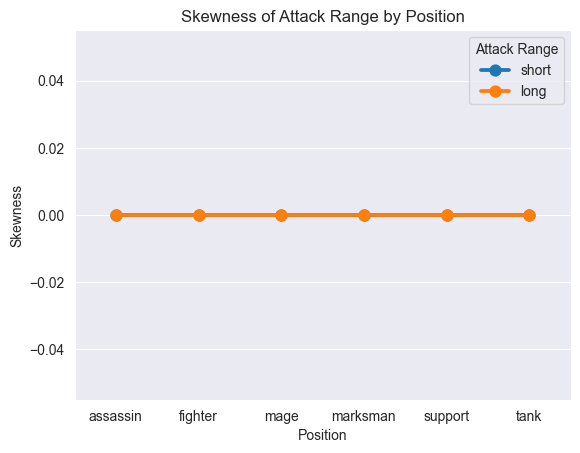

In [121]:
# Calculate the skewness of 'AttackRange' of each 'Position'.
# Returns the skewness value.
df = process_position()
df['AttackRange'] = df['AttackRange'].apply(lambda x: 0 if x == 'short' else 1)
skewness_values = df.groupby(['Position', 'AttackRange'])['AttackRange'].skew()
skewness_values.replace(np.nan, 0, inplace=True)
skewness_table = skewness_values.unstack(fill_value=0)
skewness_table = skewness_table.rename(columns={0: 'short', 1: 'long'})
skewness_table.reset_index(inplace=True)
skewness_table.columns = ['Position', 'short', 'long']
skewness_table.drop(skewness_table[skewness_table['Position'] == 'no'].index, inplace=True)
skewness_table.reset_index(drop=True, inplace=True)
print(skewness_table)

skewness_table_long = skewness_table.melt(id_vars='Position', var_name='AttackRange', value_name='Skewness')

# Plot the bar graph
sns.pointplot(x='Position', y='Skewness', hue='AttackRange', data=skewness_table_long)

plt.xlabel('Position')
plt.ylabel('Skewness')
plt.title('Skewness of Attack Range by Position')
plt.legend(title='Attack Range')
plt.show()

   Position  CoefficientOfVariation
0  assassin                0.695338
1   fighter                1.018233
2      mage                0.237354
3  marksman                0.372277
4   support                0.313917
5      tank                0.728669


Text(0, 0.5, 'CoefficientOfVariation')

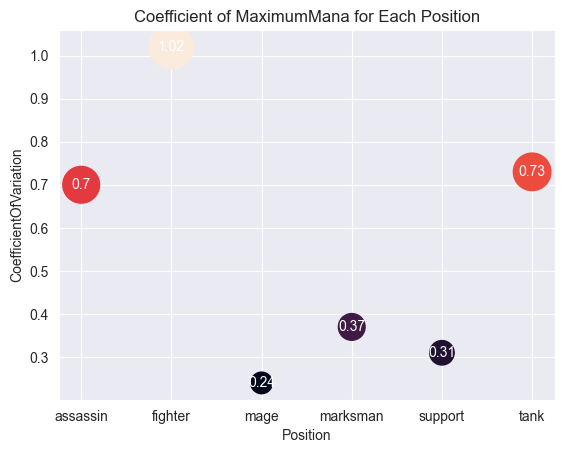

In [128]:
# Calculate the coefficient of variation for 'MaximumMana' of each 'Position'.
# Returns the coefficient of variation value for each 'Position'.
df = process_position()
df = df.groupby('Position')['MaximumMana'].std() / df.groupby('Position')['MaximumMana'].mean()
df = df.reset_index()
df.columns = ['Position', 'CoefficientOfVariation']
df.drop(df[df['Position'] == 'no'].index, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df)

plt.subplot(1,1,1)

x=np.array(df['Position'])
y=np.array(np.round(df['CoefficientOfVariation'], 2))

colors = y*10 - 20
area = y*1000
plt.scatter(x,y,c=colors,marker="o",s=area)

plt.title("Coefficient of MaximumMana for Each Position",loc="center")

for a,b in zip(x,y):
    plt.text(a,b,b,ha="center",va="center",fontsize=10,color="white")

plt.xlabel("Position")
plt.ylabel("CoefficientOfVariation")

   Position  Covariances
0   fighter     3.290809
1      tank     4.714713
2      mage     1.506593
3   support    15.702347
4  assassin    40.784615
5  marksman    39.853563


C:\Users\24569\AppData\Local\Temp\ipykernel_15432\3868467397.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Covariances', data=result_df, palette='viridis')


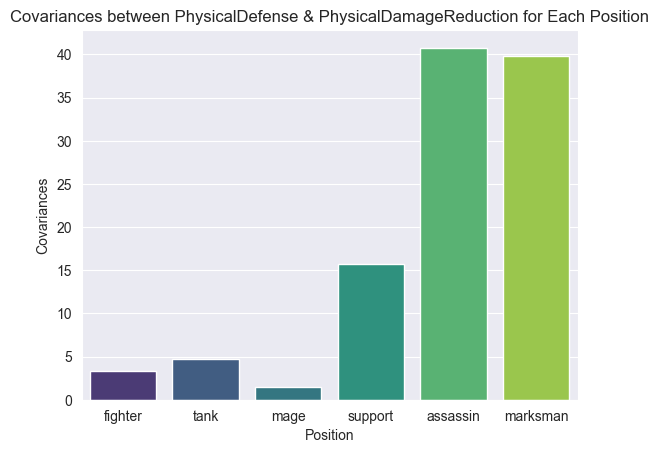

In [129]:
# Calculate the covariance between 'PhysicalAttack' and 'MagicAttack'.
# Returns the covariance value.
df = process_position()
physical_defense = df['PhysicalDefense'].values
physical_damage_reduction = df['PhysicalDamageReduction'].values
total_covariance = np.cov(physical_defense, physical_damage_reduction)[0, 1]
grouped_covariances = df.groupby('Position')[["PhysicalDefense", "PhysicalDamageReduction"]].cov().iloc[0::2,
                      1].reset_index(drop=True)
result_df = pd.DataFrame({
    'Position': df['Position'].unique(),
    'Covariances': grouped_covariances.values
})
result_df = result_df[result_df['Position'] != 'no']
result_df.reset_index(drop=True, inplace=True)
print(result_df)

sns.barplot(x='Position', y='Covariances', data=result_df, palette='viridis')
plt.title('Covariances between PhysicalDefense & PhysicalDamageReduction for Each Position')
plt.xlabel('Position')
plt.ylabel('Covariances')
plt.show()

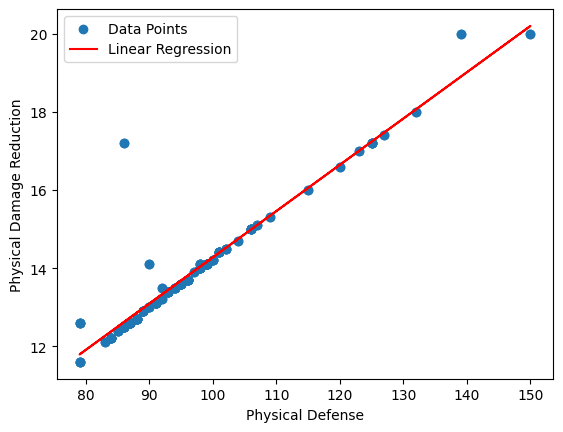

18.94738442278458

In [18]:
# Calculate the covariance between 'PhysicalAttack' and 'MagicAttack' by linear regression.
# Returns the covariance value.
df = process_position()

physical_defense = df['PhysicalDefense'].values
physical_damage_reduction = df['PhysicalDamageReduction'].values

covariance_value = np.cov(physical_defense, physical_damage_reduction)[0, 1]

A = np.vstack([physical_defense, np.ones_like(physical_defense)]).T
m, c = np.linalg.lstsq(A, physical_damage_reduction, rcond=None)[0]

plt.scatter(physical_defense, physical_damage_reduction, label='Data Points')
plt.plot(physical_defense, m * physical_defense + c, 'r', label='Linear Regression')

plt.xlabel('Physical Defense')
plt.ylabel('Physical Damage Reduction')
plt.legend()
plt.show()

covariance_value

In [19]:
 # Calculate the correlation between 'PhysicalDefense' and 'MovementSpeed'.
 #    Returns the correlation value.
process_position().groupby('Position')[['PhysicalDefense', 'MovementSpeed']].corr().iloc[0, 1]

0.024336227130506424

In [20]:
 # Perform a chi-square test for independence between 'mainPosition' and 'AttackRange'.
 # Returns the chi-square statistic and p-value.
df = process_position()
observed_values = dict()
for _, row in df.iterrows():
    position = row['Position']
    attack_range = row['AttackRange']
    observed_values[(position, attack_range)] = observed_values.get((position, attack_range), 0) + 1

positions = sorted(set(row[0] for row in observed_values))
attack_ranges = sorted(set(row[1] for row in observed_values))

observed_matrix = [[observed_values.get((position, attack_range), 0) for attack_range in attack_ranges] for position
                   in positions]

row_totals = [sum(row) for row in observed_matrix]
col_totals = [sum(row[i] for row in observed_matrix) for i in range(len(attack_ranges))]
total = sum(row_totals)

expected_matrix = [[(row_total * col_total) / total for col_total in col_totals] for row_total in row_totals]

chi2_stat = sum(
    (observed_matrix[i][j] - expected_matrix[i][j]) ** 2 / expected_matrix[i][j] for i in range(len(positions)) for
    j in range(len(attack_ranges)))

degrees_of_freedom = (len(positions) - 1) * (len(attack_ranges) - 1)

def chi2_cdf(x, df):
    t = 0.5 * x
    s = np.exp(-t)
    cdf = s

    for i in range(1, df // 2):
        t *= x / (2.0 * i)
        s += t
        if s * (1.0 + 1.0 / (df - 2 * i)) >= 1.0:
            break

    return min(s, 1.0)

p_value = 1 - chi2_cdf(chi2_stat, degrees_of_freedom)

chi2_stat, p_value

(86.13169619813307, 0.0)

In [21]:
# Calculate the t-statistic for the difference between 'PhysicalDamageReduction' and 'MagicDamageReduction'.
# Returns the t-statistic value.
df = process_position()

sample_physical = df['PhysicalDamageReduction'].dropna().to_numpy()
sample_magic = df['MagicDamageReduction'].dropna().to_numpy()

mean_physical = np.mean(sample_physical)
mean_magic = np.mean(sample_magic)

std_physical = np.std(sample_physical, ddof=1)
std_magic = np.std(sample_magic, ddof=1)

n_physical = len(sample_physical)
n_magic = len(sample_magic)

numerator = mean_physical - mean_magic
denominator = np.sqrt((std_physical**2 / n_physical) + (std_magic**2 / n_magic))
t_statistic = numerator / denominator

t_statistic


52.43056837851716

In [22]:
# Calculate the effect size for the difference in 'MaximumHealth'.
# Returns the effect size value.
df = process_position()
df = (df.groupby('Position')['MaximumHealth'].mean() - df.groupby('Position')['MaximumHealth'].min()) / df.groupby('Position')['MaximumHealth'].std()
df = df.reset_index()
df.columns = ['Position', 'EffectSize']
df.drop(df[df['Position'] == 'no'].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Position,EffectSize
0,assassin,2.080381
1,fighter,1.931060
2,mage,4.950004
3,marksman,1.471812
4,support,1.492000
5,tank,3.999410


In [23]:
 # Calculate the mean difference in 'AttackRange' between 'mainPosition' categories.
 # Returns the mean difference value.
df = process_position()
df = df.groupby('Position')['AttackRange'].apply(
    lambda x: x.apply(lambda y: 0 if y == 'short' else 1).mean()).diff().iloc[-1]
df

-0.4380952380952381

In [24]:
 # Calculate the percentage difference in 'MaximumHealth' between 'assassin' and 'tank' categories.
 # Returns the percentage difference value.
((data[data['mainPosition'] == 'assassin']['MaximumHealth'].mean() - data[data['mainPosition'] == 'tank'][
        'MaximumHealth'].mean()) / data['MaximumHealth'].mean()) * 100

3.2717410906266085